<a href="https://colab.research.google.com/github/AmiraliEsi83/The-CIFAR-10-dataset/blob/main/vgg16OnCfar10_gradCam_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.keras as tk
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = tk.datasets.cifar10.load_data()
# Memory Problem....
# x_train = [tf.image.resize(img, [224,224], method='nearest') for img in x_train]
# x_test = [tf.image.resize(img, [224,224], method='nearest') for img in x_test]

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
len(x_train)

50000

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [ ]:
len(x_train)

40000

In [ ]:
IMG_SIZE = 224
def process_image(img):
  image = tf.image.convert_image_dtype(img, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
  return image

In [ ]:
sample = process_image(x_train[0])
sample.shape

TensorShape([224, 224, 3])

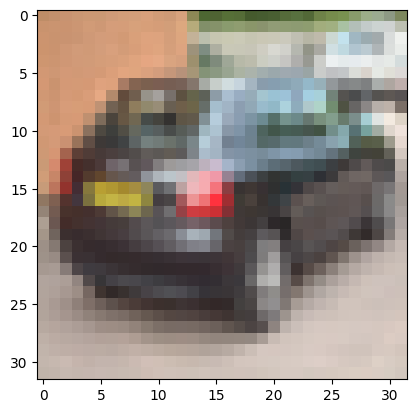

In [ ]:
plt.imshow(x_train[0])

In [ ]:
def get_image_label(image,label):
  image = process_image(image)
  return image,label

In [ ]:
Batch_SIZE = 32
def create_data_batches(X,y=None,batch_size=Batch_SIZE,valid_data = False, test_data=False):
  
      if test_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data = data.map(process_image)
        data_batch = data.batch(Batch_SIZE)
        return data_batch
      elif valid_data:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        data = data.map(get_image_label)
        data_batch = data.batch(Batch_SIZE)
        return data_batch

      else:
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_image_label)
        data_batch = data.batch(Batch_SIZE)
        return data_batch
        
        



In [ ]:
trainig_data = create_data_batches(x_train, y_train)
valid_data = create_data_batches(x_validate, y_validate, valid_data=True)


In [ ]:
testing_data = create_data_batches(x_test,test_data=True)

In [ ]:
len(testing_data)

313

In [ ]:
example = next(testing_data.as_numpy_iterator())

In [ ]:
example[0].shape

(224, 224, 3)

In [ ]:
example[0]

array([[[0.61960787, 0.43921572, 0.19215688],
        [0.61960787, 0.43921572, 0.19215688],
        [0.61960787, 0.43921572, 0.19215688],
        ...,
        [0.454902  , 0.33333334, 0.12941177],
        [0.454902  , 0.33333334, 0.12941177],
        [0.454902  , 0.33333334, 0.12941177]],

       [[0.61960787, 0.43921572, 0.19215688],
        [0.61960787, 0.43921572, 0.19215688],
        [0.61960787, 0.43921572, 0.19215688],
        ...,
        [0.454902  , 0.33333334, 0.12941177],
        [0.454902  , 0.33333334, 0.12941177],
        [0.454902  , 0.33333334, 0.12941177]],

       [[0.61960787, 0.43921572, 0.19215688],
        [0.61960787, 0.43921572, 0.19215688],
        [0.61960787, 0.43921572, 0.19215688],
        ...,
        [0.454902  , 0.33333334, 0.12941177],
        [0.454902  , 0.33333334, 0.12941177],
        [0.454902  , 0.33333334, 0.12941177]],

       ...,

       [[0.21176472, 0.41960788, 0.627451  ],
        [0.21176472, 0.41960788, 0.627451  ],
        [0.21176472, 0

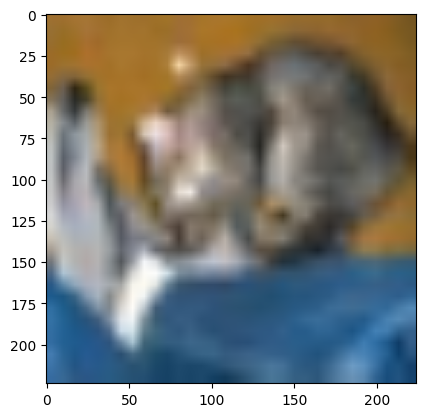

In [ ]:
plt.imshow(example[0])

Normalization

In [ ]:
type(trainig_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
type(testing_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


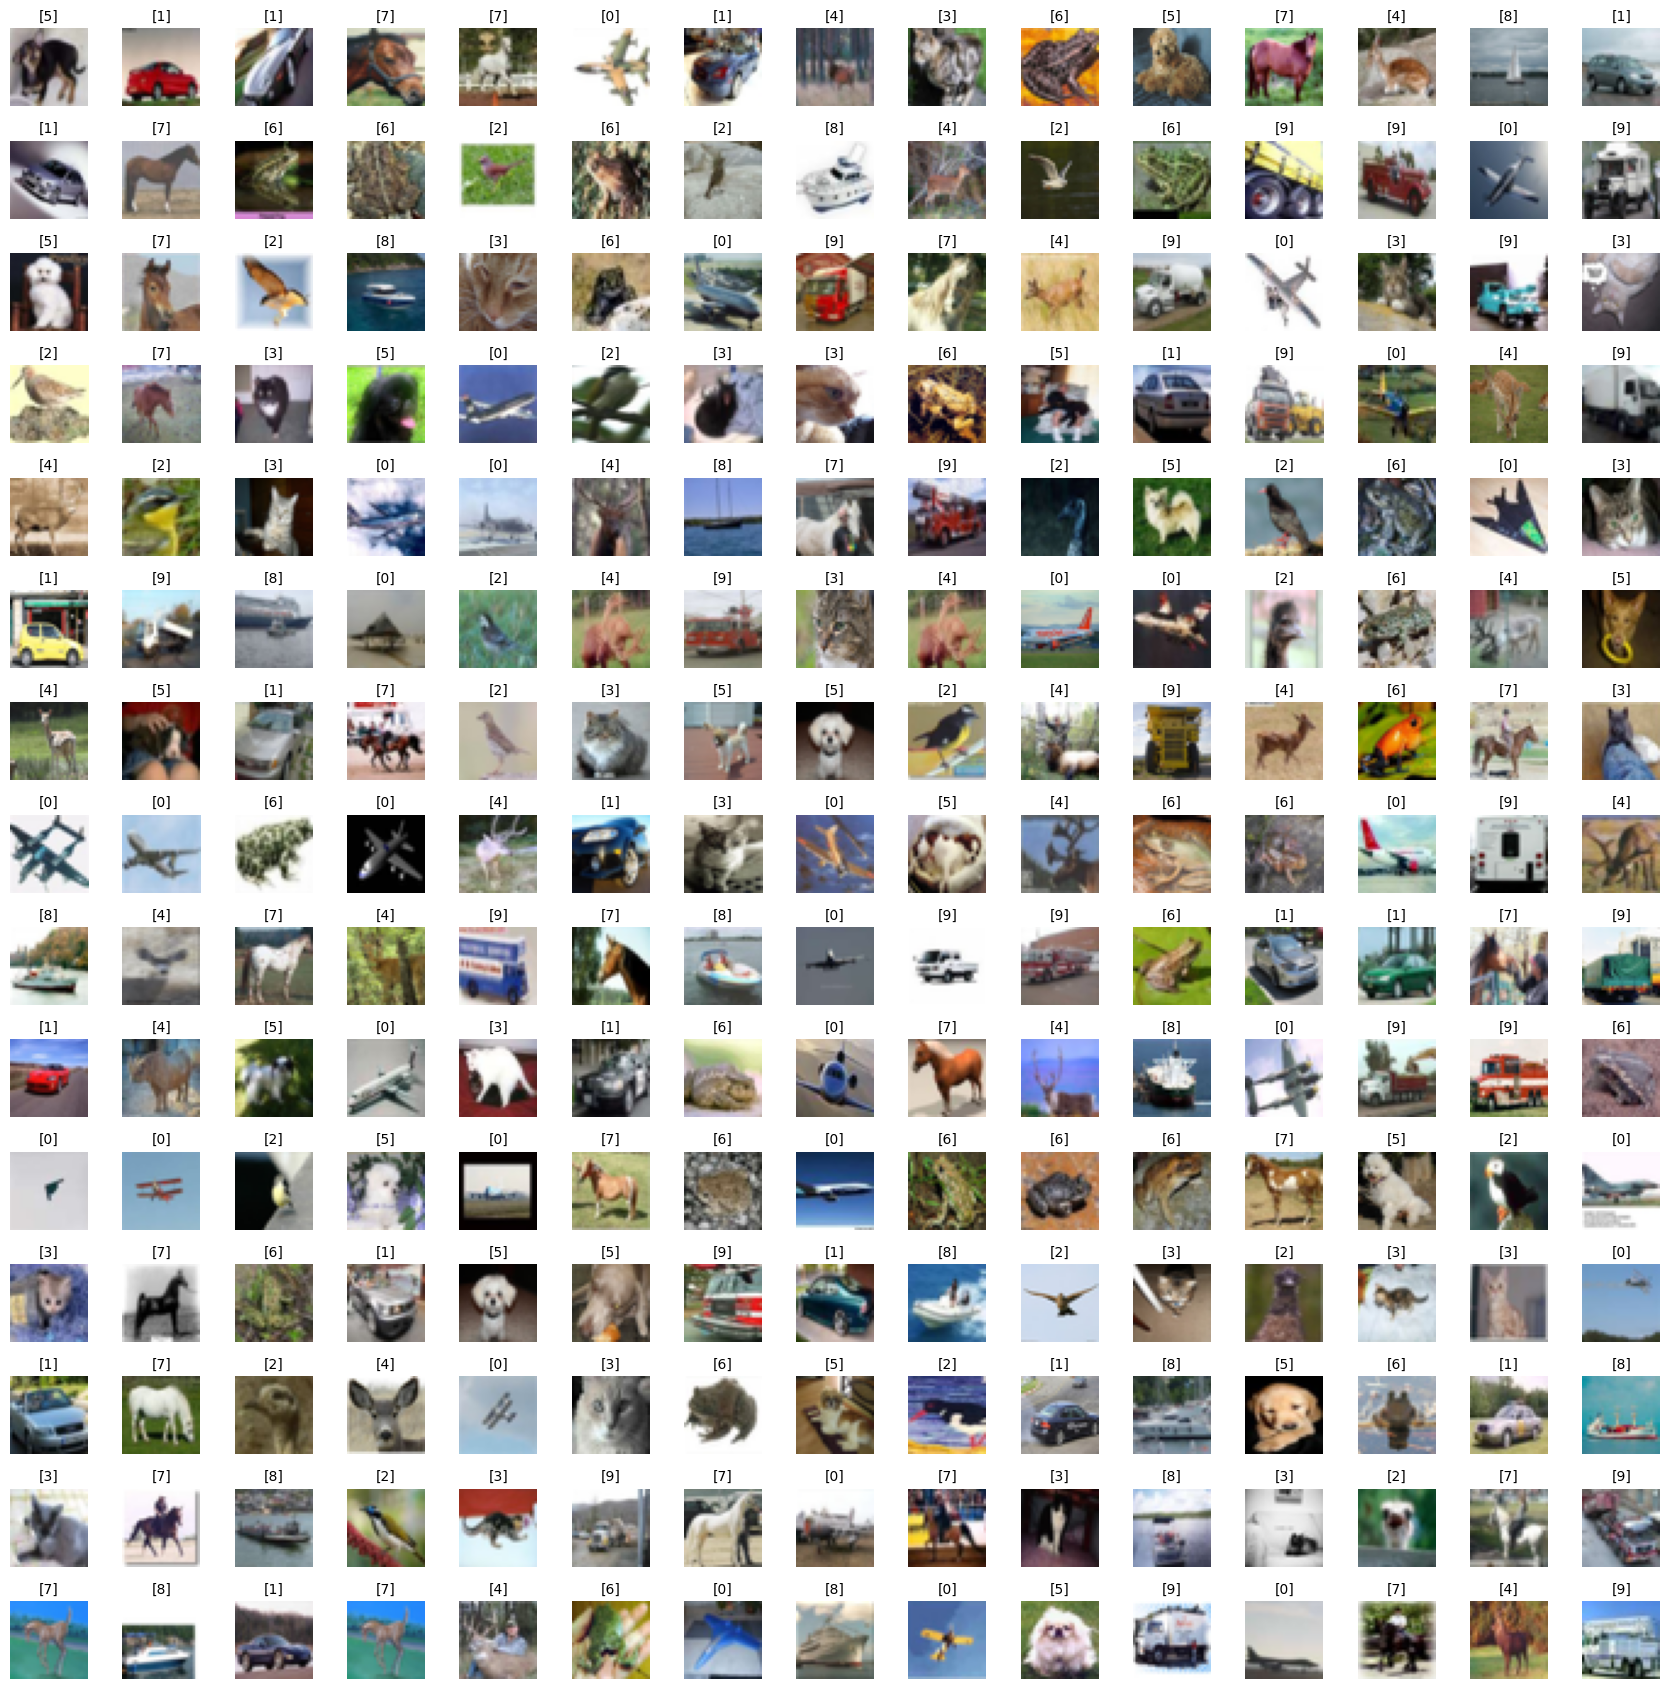

In [ ]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(w_grid,l_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
 
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize=10)
  axes[i].axis('off')
fig.tight_layout()

In [ ]:
vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=10,
                    input_shape=(224,224,3)
                   )

In [ ]:
model = tf.keras.Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization
model.add(Flatten())

model.add(Dense(4096, activation='relu', name='hidden1'))
model.add(Dense(10, activation='softmax', name='predictions'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
from tensorflow import keras

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x = trainig_data,batch_size=32, epochs=100,validation_data=valid_data, validation_freq=1)

1250/1250 [==============================] - 611s 485ms/step - loss: 1.1493 - accuracy: 0.5862 - val_loss: 0.7179 - val_accuracy: 0.7506


In [ ]:
evaluation = model.evaluate(valid_data)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

313/313 [==============================] - 45s 142ms/step - loss: 0.7179 - accuracy: 0.7506
Test accuracy: 75.06%


In [ ]:
predicted_classes = model.predict(testing_data)
predicted_classes

313/313 [==============================] - 45s 142ms/step


array([[3.3603190e-03, 3.1608832e-04, 4.3669365e-02, ..., 5.4009310e-03,
        1.9225046e-02, 8.8529277e-04],
       [1.1932817e-03, 7.6199425e-03, 6.0567828e-07, ..., 5.5726520e-08,
        9.9002749e-01, 1.1567211e-03],
       [8.4015556e-02, 4.7384359e-02, 1.1044719e-03, ..., 3.7180688e-04,
        8.2954055e-01, 3.6754943e-02],
       ...,
       [4.9214630e-04, 8.0658734e-05, 3.4936626e-02, ..., 1.8993315e-01,
        5.1053346e-04, 5.0759799e-04],
       [1.3258291e-03, 9.9746716e-01, 9.0023150e-06, ..., 8.0474769e-07,
        3.5909703e-04, 8.0035842e-04],
       [3.1095762e-05, 1.1133118e-05, 3.0102415e-04, ..., 9.8488718e-01,
        5.5977048e-06, 1.7035132e-06]], dtype=float32)

In [ ]:
print(predicted_classes[0])
y_test[0]

[0.0986189  0.10088988 0.10149376 0.0980612  0.10043865 0.09875485
 0.0988587  0.1032366  0.099221   0.10042644]


array([3], dtype=uint8)

In [ ]:
np.argmax(predicted_classes[0])

7

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
fig, axes = plt.subplots(5,5,figsize=(12,12))
axes = axes.ravel()
print(axes.shape)
x_test[0].shape
for i in np.arange(0,25):
  axes[i].imshow(x_test[i].reshape(32,32,3))
  # axes[i].set_title(f"Prediction Class = {np.argmax(predicted_classes[i]):.1f}\nTrue class = {y_test[i]}")


  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [ ]:
!pip install tf_keras_vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vis.utils import utils
from matplotlib import cm
from tensorflow import keras
from tf_keras_vis.gradcam import Gradcam
import matplotlib.pyplot as plt
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras.applications.vgg16 import preprocess_input
from IPython.display import Image, display


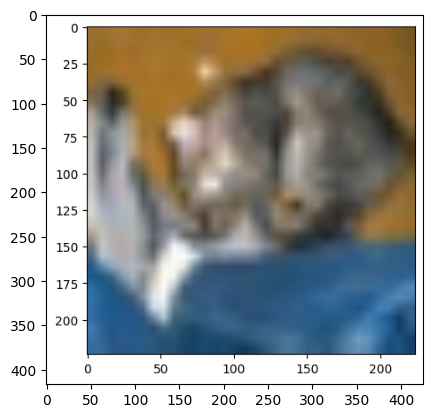

In [ ]:
img_path="/content/a.png"
img=keras.preprocessing.image.load_img(img_path)
plt.imshow(img)

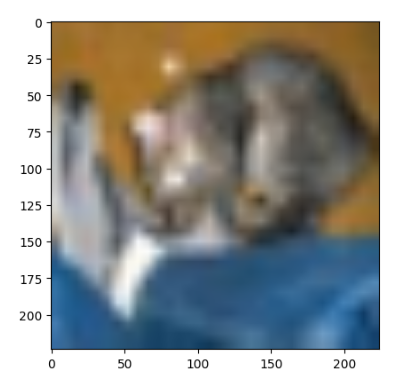

1/1 [==============================] - 0s 52ms/step

last_conv_layer_model:
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                 

<ipython-input-74-151ae95f0678>:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


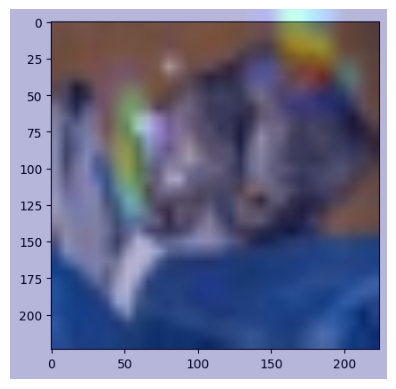

In [ ]:
model_builder = keras.applications.vgg16.VGG16
img_size = (224, 224)
preprocess_input = keras.applications.vgg16.preprocess_input
decode_predictions = keras.applications.vgg16.decode_predictions

last_conv_layer_name = "block5_conv3"
classifier_layer_names = ["block5_pool", "flatten_7", "hidden1", "predictions"]

img_path="/content/a.png"
img=keras.preprocessing.image.load_img(img_path)
plt.imshow(img); plt.axis("off"); plt.show()

def get_img_array(img_path, size):
  # `img` is a PIL image of size 224x224
  img = keras.preprocessing.image.load_img(img_path, target_size=size)
  # `array` is a float32 Numpy array of shape (224, 224, 3)
  array = keras.preprocessing.image.img_to_array(img)
  # We add a dimension to transform our array into a "batch"
  # of size (1, 224, 224, 3)
  array = np.expand_dims(array, axis=0)
  return array

def make_gradcam_heatmap(img_array, model, 
                         last_conv_layer_name, classifier_layer_names):
  # First, we create a model that maps the input image to the activations
  # of the last conv layer
  last_conv_layer = model.get_layer(last_conv_layer_name)
  last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)
  
  #Imprime o modelo da rede ate a ultima camada convolucional
  print("\nlast_conv_layer_model:"); last_conv_layer_model.summary(); print()

  # Second, we create a model that maps the activations of the last conv
  # layer to the final class predictions
  classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
  x = classifier_input
  for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
  classifier_model = keras.Model(classifier_input, x)

  #Imprime o modelo da rede da ultima camada convolucional ate predicao
  print("\nclassifier_model:"); classifier_model.summary(); print()

  # Then, we compute the gradient of the top predicted class for our input image
  # with respect to the activations of the last conv layer
  with tf.GradientTape() as tape:
    # Compute activations of the last conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    # Compute class predictions
    preds = classifier_model(last_conv_layer_output)
    print("preds:",type(preds),preds.shape,preds.dtype)
    top_pred_index = tf.argmax(preds[0])
    print("top_pred_index:",top_pred_index)
    top_class_channel = preds[:, top_pred_index]
    print("top_class_channel:",top_class_channel,
          type(top_class_channel),top_class_channel.shape,top_class_channel.dtype)

  # This is the gradient of the top predicted class with regard to
  # the output feature map of the last conv layer
  grads = tape.gradient(top_class_channel, last_conv_layer_output)
  print("grads:",type(grads),grads.shape,grads.dtype)

  # This is a vector where each entry is the mean intensity of the gradient
  # over a specific feature map channel
  pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
  print("pooled_grads:",type(pooled_grads),pooled_grads.shape,pooled_grads.dtype)

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the top predicted class
  print("last_conv_layer_output:",type(last_conv_layer_output),
        last_conv_layer_output.shape,last_conv_layer_output.dtype)
  last_conv_layer_output = last_conv_layer_output.numpy()[0]
  print("last_conv_layer_output:",type(last_conv_layer_output),
        last_conv_layer_output.shape,last_conv_layer_output.dtype)
  pooled_grads = pooled_grads.numpy()
  print("pooled_grads:",type(pooled_grads),pooled_grads.shape,pooled_grads.dtype)  
  for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
  print("last_conv_layer_output:",type(last_conv_layer_output),
        last_conv_layer_output.shape,last_conv_layer_output.dtype)

  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation
  heatmap = np.mean(last_conv_layer_output, axis=-1)

  # For visualization purpose, we will also normalize the heatmap between 0 & 1
  # Elimina parte negativa (relu)
  heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
  return heatmap

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))



# Print what the top predicted class is
preds = model.predict(img_array)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
  img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
# plt.matshow(heatmap); plt.show()

# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
# save_path = "cam_"+img_path; superimposed_img.save(save_path)

# Display Grad CAM
plt.imshow(superimposed_img); plt.axis("off"); plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
